In [1]:
from pandas import read_csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
import yfinance as yahooFinance
 
GetFacebookInformation = yahooFinance.Ticker("BTC-USD")

df = GetFacebookInformation.history(period="max")
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0,0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0,0
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0,0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0,0


In [3]:
df = df.iloc[:,0:5]
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2022-06-07,31371.742188,31489.683594,29311.683594,31155.478516,40770974039
2022-06-08,31151.480469,31253.691406,29944.404297,30214.355469,30242059107
2022-06-09,30215.279297,30609.310547,30020.265625,30111.998047,21692004719
2022-06-10,30110.330078,30245.808594,28978.146484,29083.804688,29867476527
2022-06-12,28374.761719,28497.107422,28308.392578,28365.636719,27789008896


In [4]:
df.shape

(2825, 5)

In [5]:
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

## Plot

In [6]:
cols = list(df.columns)
print(cols)

# creating the appropriate subplot indices for the cols to be used for making plots
ind = list(range(1, len(cols)))

['Open', 'High', 'Low', 'Close', 'Volume']


In [7]:
def plot_series_of_each_column(d_f, cols=cols):
    fig = plt.figure(figsize=(18, 12))
    for i, col in zip(ind, cols):
        a = fig.add_subplot(4, 2, i)
        plt.xlabel('year')
        plt.ylabel(col)
        plt.plot(d_f.index, d_f[col], '-')
        plt.grid()
    
    a = fig.add_subplot(4, 1, 4)
    plt.xlabel('year')
    plt.ylabel('Volume')
    plt.plot(d_f.index, d_f['Volume'], '-')
    plt.grid()

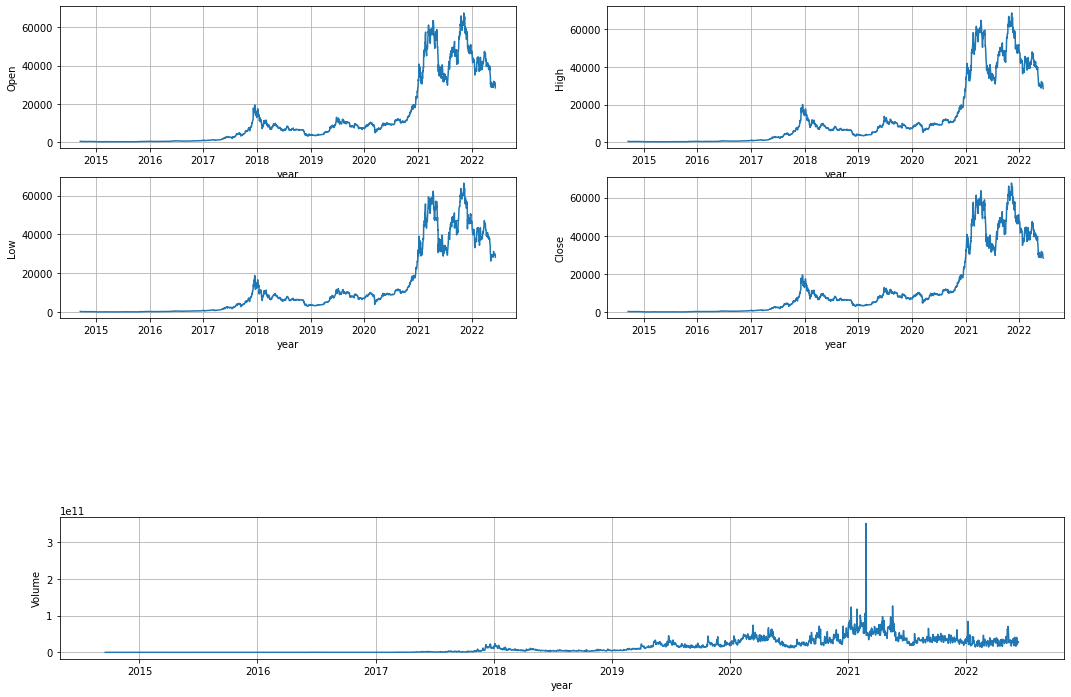

In [8]:
plot_series_of_each_column(df)

因為圖中顯示結構性改變所以data取2021-01-01到2022-05-031

In [9]:
df1 = df.loc["2021-01-01":"2022-05-31",:]

In [10]:
df1.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,40730301359
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,67865420765
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,78665235202
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,81163475344
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,67547324782


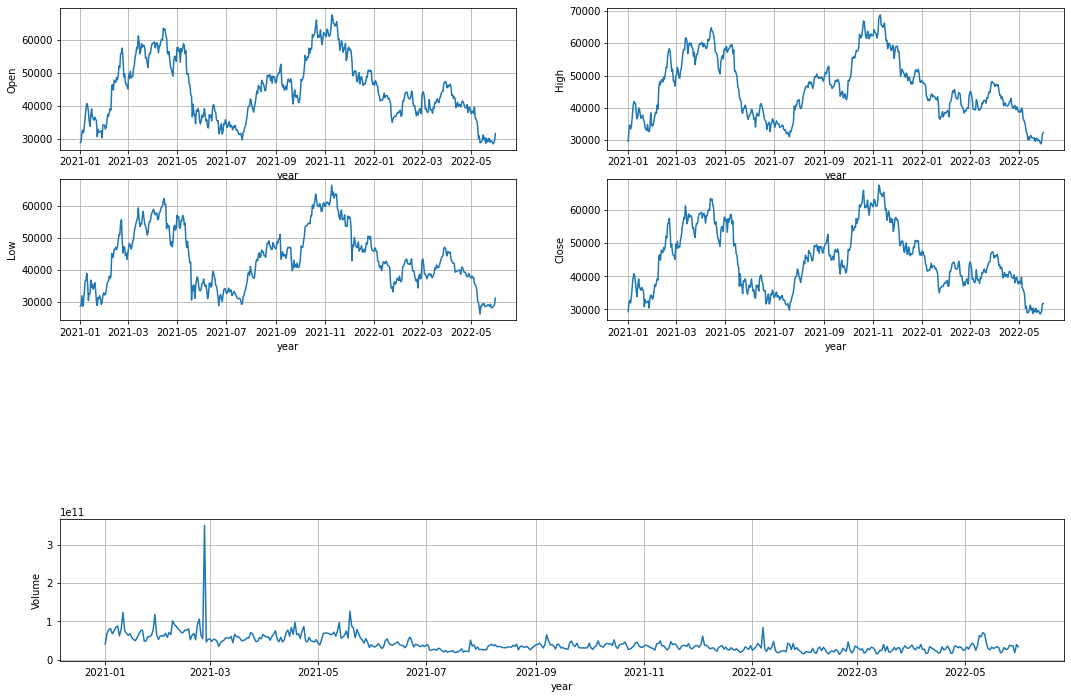

In [11]:
plot_series_of_each_column(df1)

## Correlation Test

In [12]:
df1.corr() # correlation dataframe

,Open,High,Low,Close,Volume
Open,1.000000,0.993150,0.987237,0.982356,0.143065
High,0.993150,1.000000,0.986673,0.992253,0.170610
Low,0.987237,0.986673,1.000000,0.991225,0.078456
Close,0.982356,0.992253,0.991225,1.000000,0.129787
Volume,0.143065,0.170610,0.078456,0.129787,1.000000


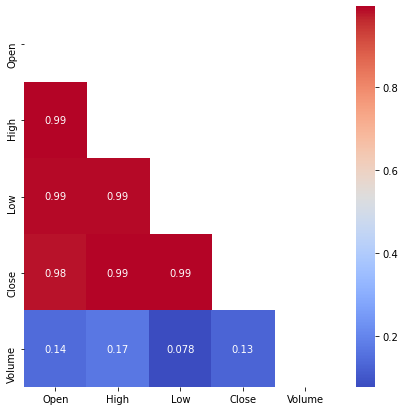

In [13]:
# correlation heatmap
mask = np.triu(df1.corr())
plt.figure(figsize=(7, 7)) 
sns.heatmap(df1.corr(), mask=mask, xticklabels=True, yticklabels=True, cmap='coolwarm', annot=True)
#xticklabels and yticklabels are set to True to display all columns in the heatmap
plt.show()

OHLC彼此成高度相關但和交易量的相關性很低

### ADF Test

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
# defining a function to print out adf results
def get_adf_results(df):
    results_cols = ['ADF_Stat', 'p_value', 'n_lags', 'n_observations', '1%', '5%', '10%']
    results = {k: [] for k in results_cols}
    
    for col in df:
    # for each column,
        adf_result = adfuller(df[col]) # computes the adf result
        
        for i in range(len(results_cols)):
            if i < 4:
                results[results_cols[i]].append(adf_result[i])
            else:
                results[results_cols[i]].append(adf_result[4][results_cols[i]])
                
    return pd.DataFrame(results, index=df.columns)

In [16]:
get_adf_results(df1)

,ADF_Stat,p_value,n_lags,n_observations,1%,5%,10%
Open,-2.251082,0.188230,0,515,-3.443112,-2.867168,-2.569768
High,-1.965251,0.302014,1,514,-3.443136,-2.867179,-2.569774
Low,-2.339385,0.159580,0,515,-3.443112,-2.867168,-2.569768
Close,-2.229989,0.195542,0,515,-3.443112,-2.867168,-2.569768
Volume,-2.371783,0.149859,14,501,-3.443470,-2.867326,-2.569852


In [17]:
get_adf_results(np.log(df1))

,ADF_Stat,p_value,n_lags,n_observations,1%,5%,10%
Open,-2.234424,0.193990,1,514,-3.443136,-2.867179,-2.569774
High,-1.952036,0.307991,1,514,-3.443136,-2.867179,-2.569774
Low,-2.378201,0.147984,4,511,-3.443212,-2.867213,-2.569791
Close,-2.064558,0.259002,1,514,-3.443136,-2.867179,-2.569774
Volume,-2.145015,0.226803,15,500,-3.443496,-2.867338,-2.569858


取log前後的 OHLC 和 Volumn 皆非平穩 所以對取log後進行一階差分

In [18]:
df1_diff = np.log(df1).diff().iloc[1:,:]
get_adf_results(df1_diff)

,ADF_Stat,p_value,n_lags,n_observations,1%,5%,10%
Open,-23.936454,0.000000e+00,0,514,-3.443136,-2.867179,-2.569774
High,-20.977621,0.000000e+00,0,514,-3.443136,-2.867179,-2.569774
Low,-10.900274,1.164010e-19,3,511,-3.443212,-2.867213,-2.569791
Close,-23.955019,0.000000e+00,0,514,-3.443136,-2.867179,-2.569774
Volume,-8.140858,1.029111e-12,14,500,-3.443496,-2.867338,-2.569858


取log後 OHLC 和 Volumn 的成長率皆平穩 

### 再觀察一下各個變數變動率的相關性(先不講)

In [19]:
df1_diff.corr() 

,Open,High,Low,Close,Volume
Open,1.000000,0.531105,0.397353,-0.050261,0.020998
High,0.531105,1.000000,0.444794,0.545242,0.210272
Low,0.397353,0.444794,1.000000,0.582606,-0.404639
Close,-0.050261,0.545242,0.582606,1.000000,-0.098711
Volume,0.020998,0.210272,-0.404639,-0.098711,1.000000


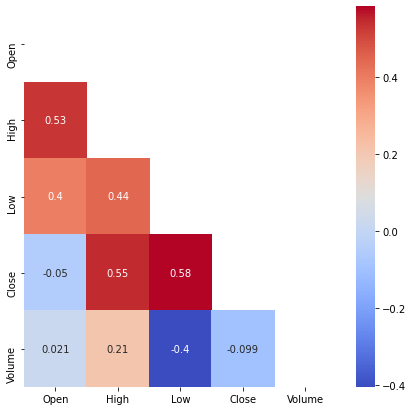

In [20]:
# correlation heatmap
mask = np.triu(df1_diff.corr())
plt.figure(figsize=(7, 7)) 
sns.heatmap(df1_diff.corr(), mask=mask, xticklabels=True, yticklabels=True, cmap='coolwarm', annot=True)
#xticklabels and yticklabels are set to True to display all columns in the heatmap
plt.show()

可以看到最高價和最低價的變動率與收盤價呈中度正相關， <br>
開盤價的變動率和最高價的變動率呈中度正相關，表示開盤價成長越多，最高價可能也會跟著成長 <br>
此外，最低價的變動率和交易量的變動率呈中度負相關，表示最低價下降越多，交易量將會上升。

# ARIMA

In [21]:
# creating a time series split function
def ts_train_test_split(df, test_size):
    len_test = int(df.shape[0]*test_size)
    split_point = df.index[-len_test]
    
    train, test = df[df.index < split_point], df[df.index >= split_point]
    
    return train, test

In [22]:
# splitting OHLCWp into train and test set
OHLCV_train, OHLCV_test = ts_train_test_split(df1_diff, 0.3)

In [23]:
from statsmodels.stats.diagnostic import acorr_ljungbox

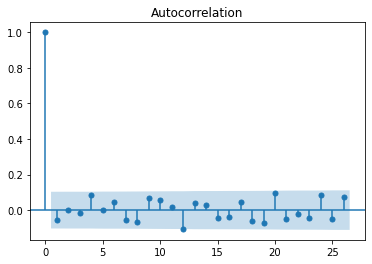

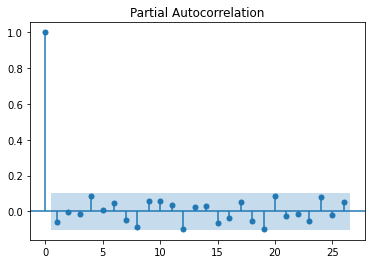

In [24]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import acf,pacf,plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARMA, ARIMA 

plot_acf(OHLCV_train['Close'])
plot_pacf(OHLCV_train['Close'])
plt.show()

In [25]:
arma = ARIMA(np.log(df1)['Close'], order=(0, 1, 0)).fit()
arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                  515
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 926.007
Method:                           css   S.D. of innovations              0.040
Date:                Sun, 12 Jun 2022   AIC                          -1848.013
Time:                        09:42:15   BIC                          -1839.525
Sample:                    01-02-2021   HQIC                         -1844.687
                         - 05-31-2022                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.002      0.087      0.931      -0.003       0.004
==============================================================================
"""

In [26]:
predicts = arma.predict(start=len(OHLCV_train['Close']), end=(len(OHLCV_train['Close'])+len(OHLCV_test['Close'])), dynamic = False)

Text(0, 0.5, 'Close')

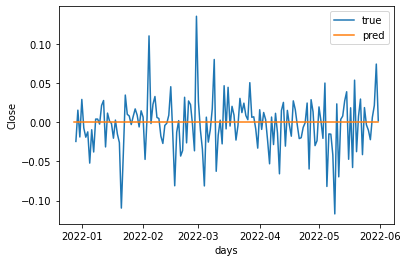

In [27]:
plt.plot(OHLCV_test['Close'])
plt.plot(predicts)
plt.legend(['true', 'pred'])
plt.xlabel('days')
plt.ylabel('Close')

In [28]:
acorr_ljungbox(arma.resid, lags=[1,4,8,12], return_df=True)

,lb_stat,lb_pvalue
1,1.405434,0.235816
4,3.078939,0.544703
8,7.574468,0.476100
12,16.968716,0.150778


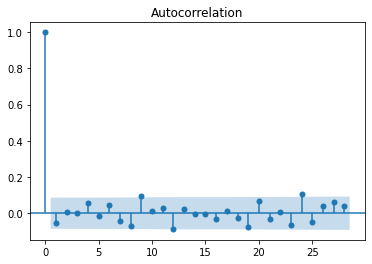

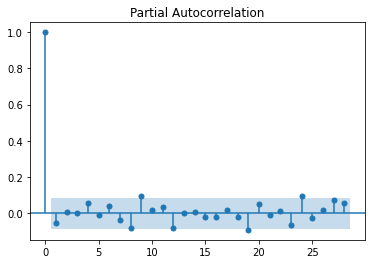

In [29]:
plot_acf(arma.resid)
plot_pacf(arma.resid)
plt.show()

In [30]:
log_train, log_test = ts_train_test_split(np.log(df1), 0.3)
restored = np.exp(log_train['Close'].append(np.cumsum(predicts) + log_train['Close'][-1]))

Text(0, 0.5, 'Close')

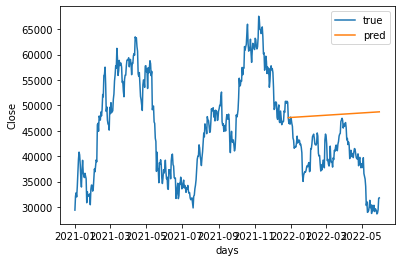

In [31]:
plt.plot(df1['Close'])
plt.plot(restored[len(log_train):])
plt.legend(['true', 'pred'])
plt.xlabel('days')
plt.ylabel('Close')

# VAR

## Modeling

In [37]:
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.vector_ar.var_model import VAR

In [38]:
model_ohlcwp = VAR(OHLCV_train) # initializes VAR object
model_ohlcwp.select_order(maxlags=20).summary() # gets the summary

,AIC,BIC,FPE,HQIC
0,-30.51,-30.45,5.631e-14,-30.49
1,-36.01,-35.67,2.299e-16,-35.87
2,-36.32,-35.71*,1.679e-16,-36.08
3,-36.57,-35.67,1.314e-16,-36.21*
4,-36.62,-35.44,1.251e-16,-36.15
5,-36.66,-35.20,1.196e-16,-36.08
6,-36.66,-34.91,1.207e-16,-35.96
7,-36.66,-34.63,1.209e-16,-35.85
8,-36.67,-34.36,1.196e-16,-35.75
9,-36.64,-34.06,1.230e-16,-35.61


from the AIC & FPE score, the best lag order to use for OHLCV is 10 <br>

In [39]:
model = VAR(OHLCV_train)
results = model.fit(10)
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 12, Jun, 2022
Time:                     09:43:28
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -33.8330
Nobs:                     351.000    HQIC:                  -35.5215
Log likelihood:           4194.70    FPE:                1.23847e-16
AIC:                     -36.6378    Det(Omega_mle):     6.28479e-17
--------------------------------------------------------------------
Results for equation Open
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const              0.000033         0.000178            0.188           0.851
L1.Open           -0.800358         0.057712          -13.868           0.000
L1.High            0.026677         0.013892            1.920           0

## Causation Test

In [40]:
def get_grangers_causation_results(df, maxlag, test='ssr_chi2test'):    
    results = []
    
    for row in df.columns:
        row_result = []
        
        for col in df.columns:
            test_result = grangercausalitytests(df[[col, row]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1], 4) for i in range(maxlag)]
            min_p_value = np.min(p_values)
            row_result.append(min_p_value)
            
        results.append(row_result)
        
    ind = [i + '_x' for i in df.columns]
    cols = [i + '_y' for i in df.columns]
    
    return pd.DataFrame(np.array(results), index=ind, columns=cols)

In [41]:
get_grangers_causation_results(df1_diff, 10)     

,Open_y,High_y,Low_y,Close_y,Volume_y
Open_x,1.0000,0.0039,0.0522,0.4059,0.0207
High_x,0.0000,1.0000,0.0000,0.1934,0.0005
Low_x,0.0000,0.0000,1.0000,0.1996,0.1606
Close_x,0.0000,0.0000,0.0000,1.0000,0.1316
Volume_x,0.0208,0.0000,0.0000,0.2592,1.0000


If a given p-value is < significance level (0.05), then the corresponding X series (row) granger causes the Y (column).

可以看到Close_y這個column的p-value是高於其他且皆大於0.05，因此Open、High、Low、Volumn do not granger cause Close，意即Open、High、Low和Volumn過去的變動率對預測Close的變動率是沒有幫助的。

## IRS

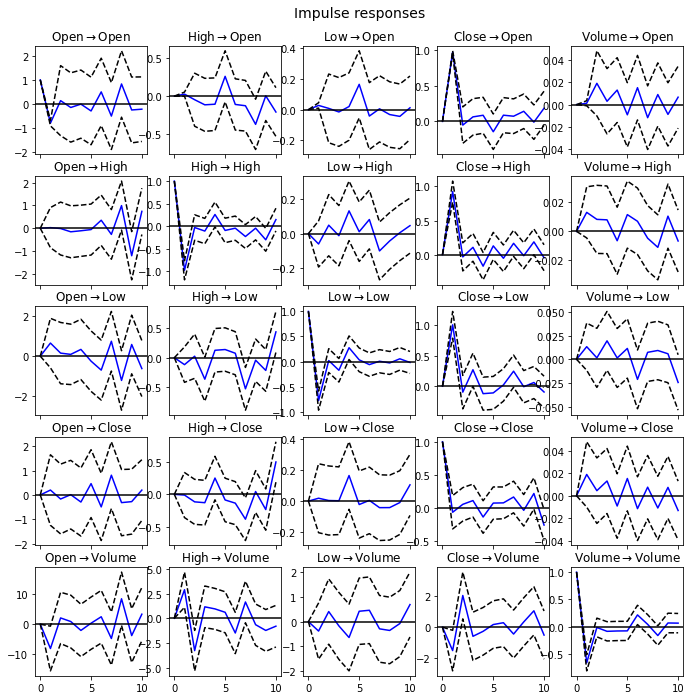

In [42]:
irf = results.irf(10).plot()
plt.show()

## Forecasting

In [43]:
def walk_forward_VAR(df, test_size, lag_order):
    
    train, test = ts_train_test_split(df, test_size) 
        
    history = [list(x) for x in np.array(train)] 
    forecasts = [] 
    
    for t in range(test.shape[0]): 
        model = VAR(np.array(history))           
        model_fit = model.fit(lag_order)
        yhat = model_fit.forecast(model.y, steps=1) 
        forecasts.append(list(yhat[0])) 
        history.append(list(np.array(test)[t]))
        
    return test, pd.DataFrame(np.array(forecasts), index=test.index)

In [44]:
OHLCV_VAR_results_test, OHLCV_VAR_results_pred = walk_forward_VAR(df1_diff, 0.3, 10)
VAR_pred = OHLCV_VAR_results_pred.copy()
VAR_test = OHLCV_VAR_results_test.copy()

In [45]:
VAR_pred.head()

,0,1,2,3,4
Date,,,,,
2021-12-29,-0.061484,-0.029361,-0.006771,0.012571,-0.136676
2021-12-30,-0.025117,-0.014052,-0.033016,-0.009977,-0.056463
2021-12-31,0.015012,0.008669,0.014624,0.006263,-0.089950
2022-01-01,-0.017197,-0.017630,-0.009964,0.009539,-0.212990
2022-01-02,0.028276,0.018217,0.014186,0.002198,-0.023195


In [46]:
VAR_test.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-12-29,-0.062194,-0.051836,-0.025910,-0.024336,-0.106628
2021-12-30,-0.024084,-0.004995,-0.003061,0.015668,-0.118679
2021-12-31,0.014495,0.012300,-0.005232,-0.018649,0.326062
2022-01-01,-0.018349,-0.013400,0.010174,0.029374,-0.408178
2022-01-02,0.029136,0.001130,0.012206,-0.007189,0.128432


In [47]:
from sklearn.metrics import mean_squared_error as mse

In [48]:
def mape(df_true, df_pred, epsilon=1e-4):
    df_true[df_true == 0] = epsilon 
    
    error = df_true - df_pred
    
    return 100 * np.mean(np.abs(error)/df_true, axis=0)

In [49]:
def get_rmse_and_mape(df_true, df_pred):
    results = {'RMSE': mse(np.array(df_true), np.array(df_pred), multioutput='raw_values', squared=False)}
    
    return pd.DataFrame(results, index=df_true.columns)

In [50]:
get_rmse_and_mape(VAR_test, VAR_pred) 

,RMSE
Open,0.001160
High,0.022780
Low,0.026771
Close,0.036317
Volume,0.283660


可以看到開盤價變動率的預測結果是比較好的，但其實開盤價就是前一天的收盤價因此不用預測， <br>
而交易量的預測結果最差，可能是變數放的不夠多不夠好

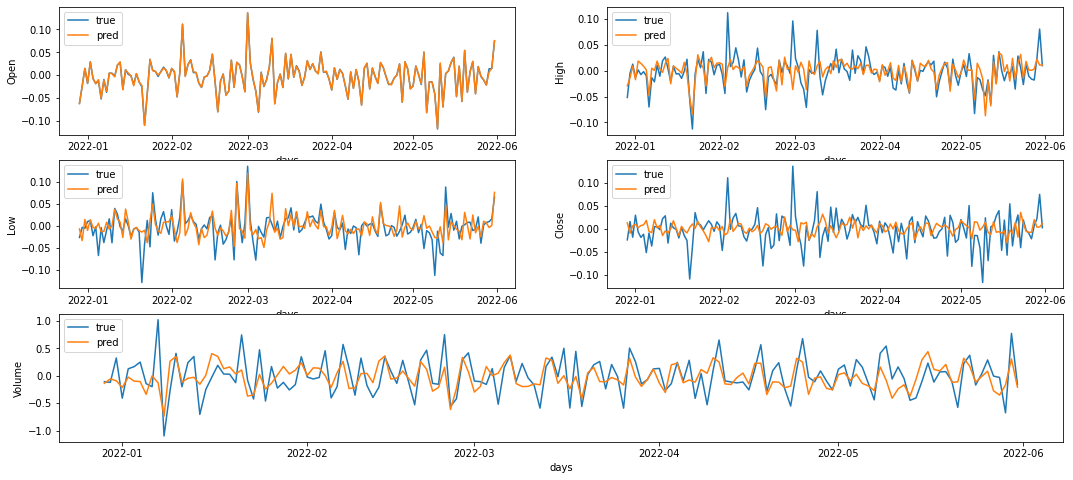

In [51]:
fig = plt.figure(figsize=(18, 8))
for i, col_test, col_pred in zip(range(1, 6), VAR_test, VAR_pred):
    if i == 5:
        a = fig.add_subplot(3, 1, 3)
        plt.plot(VAR_test[col_test])
        plt.plot(VAR_pred.iloc[:, col_pred])
        plt.legend(['true', 'pred'])
        plt.xlabel('days')
        plt.ylabel(col_test)
        
    else:
        a = fig.add_subplot(3, 2, i)
        plt.plot(VAR_test[col_test])
        plt.plot(VAR_pred.iloc[:, col_pred])
        plt.legend(['true', 'pred'])
        plt.xlabel('days')
        plt.ylabel(col_test)

### Convert to price

In [52]:
df_price_true = df1.loc["2021-12-29":,:]
df_price_pred = VAR_pred.copy()
df_price_pred.columns = df1.columns

for j in range(5):
    for i in range(df_price_pred.shape[0]-1):
        
        df_price_pred.iloc[i+1,j] = df_price_pred.iloc[i,j] + df_price_pred.iloc[i+1,j]
                
    df_price_pred[df1.columns[j]] = np.exp(df_price_pred[df1.columns[j]] + np.log(df1.loc["2021-12-28",][j]))

df_price_pred = pd.DataFrame(df_price_pred)

In [53]:
df_price_true

,Open,High,Low,Close,Volume
Date,,,,,
2021-12-29,47623.871094,48119.742188,46201.496094,46444.710938,30049226299
2021-12-30,46490.605469,47879.964844,46060.312500,47178.125000,26686491018
2021-12-31,47169.371094,48472.527344,45819.953125,46306.445312,36974172400
2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500,24582667004
2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750,27951569547
...,...,...,...,...,...
2022-05-27,29251.140625,29346.943359,28326.613281,28627.574219,36582005748
2022-05-28,28622.625000,28814.900391,28554.566406,28814.900391,35519577634
2022-05-29,29019.867188,29498.009766,28841.107422,29445.957031,18093886409


In [54]:
df_price_pred

,Open,High,Low,Close,Volume
Date,,,,,
2021-12-29,47657.726612,49213.467681,47094.272388,48190.869702,2.915973e+10
2021-12-30,46475.604720,48526.771130,45564.791029,47712.439242,2.755889e+10
2021-12-31,47178.572594,48949.285662,46236.017484,48012.193217,2.518820e+10
2022-01-01,46374.189737,48093.877740,45777.593942,48472.358197,2.035620e+10
2022-01-02,47704.197224,48978.030270,46431.627938,48579.040307,1.988947e+10
...,...,...,...,...,...
2022-05-27,29673.437049,42185.092957,44049.848612,52042.283479,1.232898e+09
2022-05-28,29044.190633,42307.367009,44356.721906,53065.232349,8.677141e+08
2022-05-29,29237.046484,43232.896274,44204.859265,53240.041394,7.356701e+08


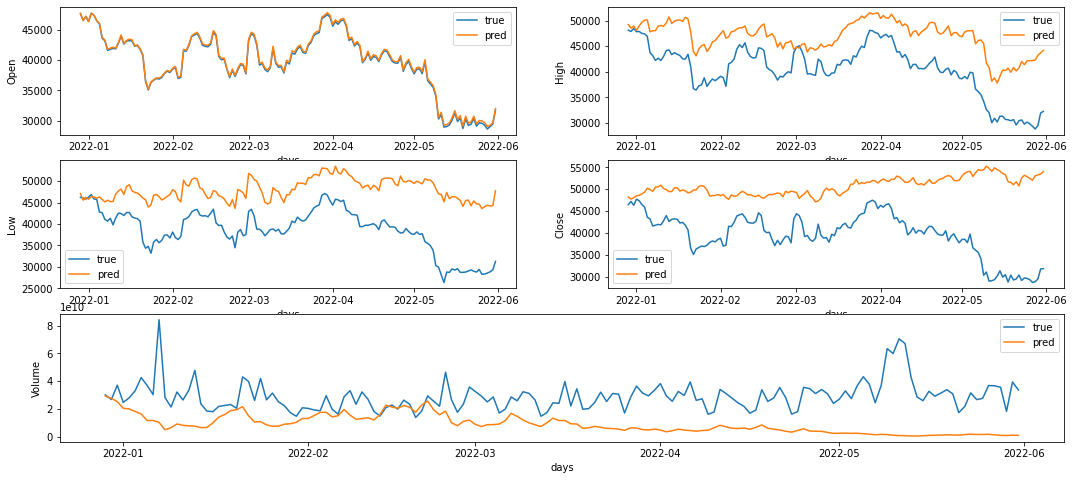

In [55]:
fig = plt.figure(figsize=(18, 8))
for i, col_test, col_pred in zip(range(1, 6), df_price_true, df_price_pred):
    if i == 5:
        a = fig.add_subplot(3, 1, 3)
        plt.plot(df_price_true[col_pred])
        plt.plot(df_price_pred[col_test])
        plt.legend(['true', 'pred'])
        plt.xlabel('days')
        plt.ylabel(col_test)
        
    else:
        a = fig.add_subplot(3, 2, i)
        plt.plot(df_price_true[col_pred])
        plt.plot(df_price_pred[col_test])
        plt.legend(['true', 'pred'])
        plt.xlabel('days')
        plt.ylabel(col_test)

### Residual

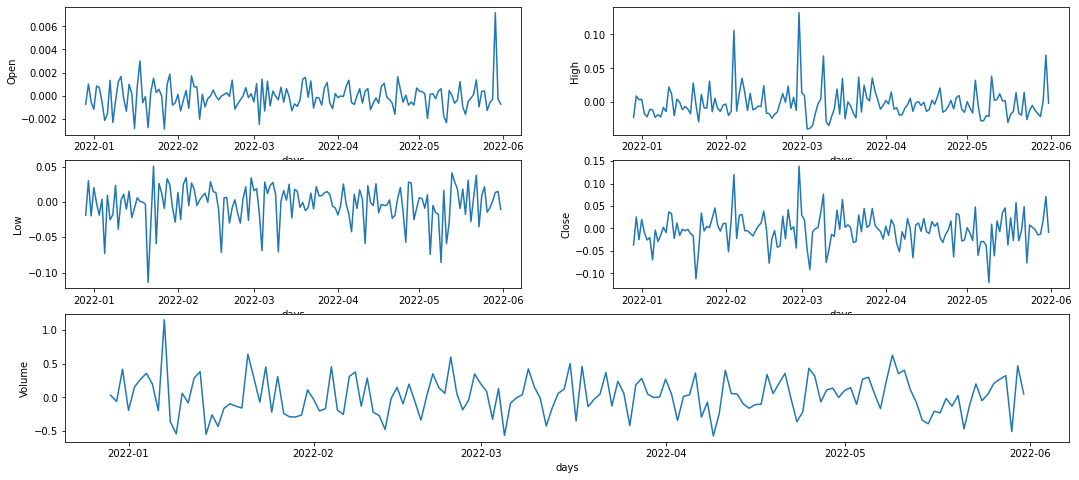

In [56]:
fig = plt.figure(figsize=(18, 8))
for i, col_test, col_pred in zip(range(1, 6), VAR_test, VAR_pred):
    if i == 5:
        a = fig.add_subplot(3, 1, 3)
        plt.plot(VAR_test[col_test] - VAR_pred[col_pred])
        plt.xlabel('days')
        plt.ylabel(col_test)
        
    else:
        a = fig.add_subplot(3, 2, i)
        plt.plot(VAR_test[col_test] - VAR_pred[col_pred])
        plt.xlabel('days')
        plt.ylabel(col_test)

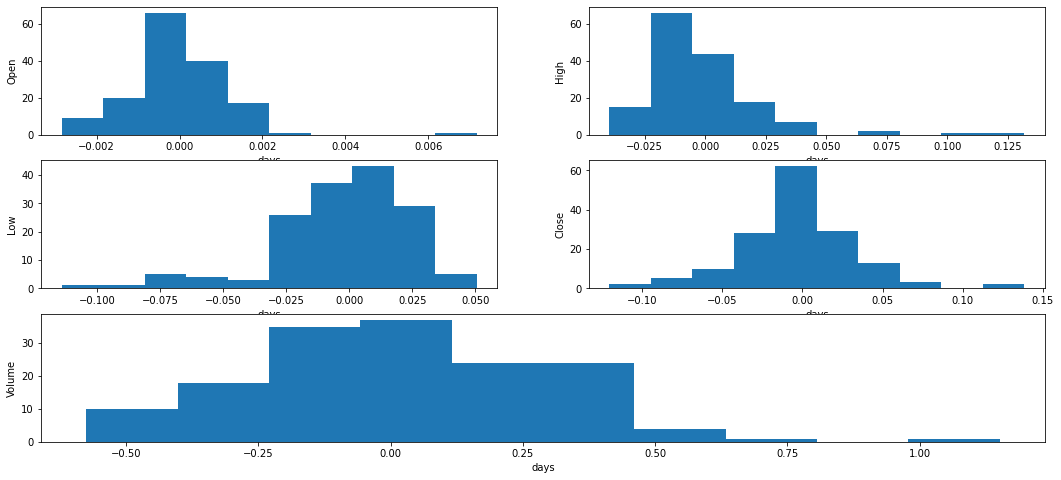

In [57]:
fig = plt.figure(figsize=(18, 8))
for i, col_test, col_pred in zip(range(1, 6), VAR_test, VAR_pred):
    if i == 5:
        a = fig.add_subplot(3, 1, 3)
        plt.hist(VAR_test[col_test] - VAR_pred[col_pred])
        plt.xlabel('days')
        plt.ylabel(col_test)
        
    else:
        a = fig.add_subplot(3, 2, i)
        plt.hist(VAR_test[col_test] - VAR_pred[col_pred])
        plt.xlabel('days')
        plt.ylabel(col_test)

In [58]:
res = pd.DataFrame()
for i, col_test, col_pred in zip(range(1, 6), VAR_test, VAR_pred):
    if i == 5:
        res[col_test] = VAR_test[col_test] - VAR_pred[col_pred]

    else:
        res[col_test] = VAR_test[col_test] - VAR_pred[col_pred]

In [59]:
res.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-12-29,-0.000711,-0.022475,-0.019139,-0.036907,0.030048
2021-12-30,0.001033,0.009056,0.029956,0.025645,-0.062216
2021-12-31,-0.000518,0.003631,-0.019856,-0.024912,0.416012
2022-01-01,-0.001152,0.004230,0.020138,0.019835,-0.195188
2022-01-02,0.000859,-0.017087,-0.001980,-0.009388,0.151627


In [60]:
acorr_ljungbox(res["Open"], lags=[1,4,8,12], return_df=True)

,lb_stat,lb_pvalue
1,1.445708,0.229218
4,10.009310,0.040271
8,16.747821,0.032845
12,24.031077,0.020144


Open的變動率第四期後殘差項就不是white noise

In [61]:
acorr_ljungbox(res["High"], lags=[1,4,8,12], return_df=True)

,lb_stat,lb_pvalue
1,0.081019,0.775921
4,3.161965,0.531096
8,5.853929,0.663590
12,17.037700,0.148185


High的變動率殘差項為white noise

In [62]:
acorr_ljungbox(res["Low"], lags=[1,4,8,12], return_df=True)

,lb_stat,lb_pvalue
1,1.828612,0.176292
4,9.390495,0.052047
8,11.819840,0.159425
12,12.962139,0.371799


Low的變動率殘差項為white noise

In [63]:
acorr_ljungbox(res["Close"], lags=[1,4,8,12], return_df=True)

,lb_stat,lb_pvalue
1,0.009676,0.921640
4,1.946670,0.745567
8,2.880247,0.941646
12,5.844574,0.923713


Close的變動率殘差項皆為white noise

In [64]:
acorr_ljungbox(res["Volume"], lags=[1,4,8,12], return_df=True)

,lb_stat,lb_pvalue
1,0.156603,0.692304
4,1.230547,0.873044
8,2.532288,0.960208
12,15.297221,0.225583


Volume的變動率殘差項皆為white noise

# ARIMA(參考用)

In [65]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

In [66]:
Close_train, Close_test = ts_train_test_split(df1["Close"], 0.3)

In [67]:
model = pm.auto_arima(Close_train, start_p=1, start_q=1,
                      information_criterion='aic',
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6488.538, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6484.538, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6486.544, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6486.539, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6482.790, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.637 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  362
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -3240.395
Date:                Sun, 12 Jun 2022   AIC                           6482.790
Time:                        09:43:49   BIC                           6486.679
Sample:                             0   HQIC                          6484.336
                                - 362                                       

In [68]:
pred = model.predict(len(Close_test))
Close_pred = pd.Series(pred, index = Close_test.index)

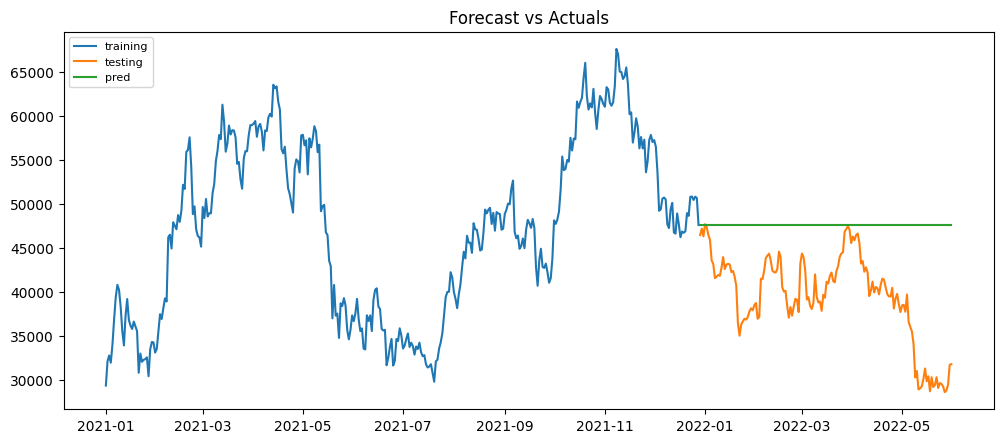

In [69]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Close_train, label='training')
plt.plot(Close_test, label='testing')
plt.plot(Close_pred, label='pred')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

用最後一期預測前面的價格

### Ljung-Box Test

In [70]:
acorr_ljungbox(model.arima_res_.resid, lags=[1,4,8,12], return_df=True)

,lb_stat,lb_pvalue
1,0.018851,0.890793
4,1.518455,0.823367
8,4.028487,0.854544
12,4.454497,0.973771
